# A Deep Dive into the Covid-19 Data of India

In [391]:
import pandas as pd

In [392]:
df = pd.read_csv('../datasets/covid_19_india.csv', index_col='Sno')
# df = pd.read_csv('../datasets/covid_19_india.csv', index_col='Sno', parse_dates=['Date'])

In [393]:
df.shape

(18110, 8)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 1 to 18110
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      18110 non-null  object
 1   Time                      18110 non-null  object
 2   State/UnionTerritory      18110 non-null  object
 3   ConfirmedIndianNational   18110 non-null  object
 4   ConfirmedForeignNational  18110 non-null  object
 5   Cured                     18110 non-null  int64 
 6   Deaths                    18110 non-null  int64 
 7   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [395]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [396]:
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [397]:
df.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


### Drop Unwanted Columns

In [398]:
df = df.drop(['Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)

### Show all State/UnionTerritory

In [399]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

In [400]:
df['State/UnionTerritory'].value_counts()

State/UnionTerritory
Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 521
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Madhya Pradesh                              509
Himachal Pradesh   

### Working with date

In [401]:
df.Date.head()

Sno
1    2020-01-30
2    2020-01-31
3    2020-02-01
4    2020-02-02
5    2020-02-03
Name: Date, dtype: object

In [402]:
## Convert to DateTime type
df['Date'] = pd.to_datetime(df.Date)

In [403]:
df.Date.head()

Sno
1   2020-01-30
2   2020-01-31
3   2020-02-01
4   2020-02-02
5   2020-02-03
Name: Date, dtype: datetime64[ns]

In [404]:
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['weekday'] = pd.DatetimeIndex(df.Date).weekday

In [405]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,year,month,weekday
Sno,,,,,,,,
1,2020-01-30,Kerala,0,0,1,2020,1,3
2,2020-01-31,Kerala,0,0,1,2020,1,4
3,2020-02-01,Kerala,0,0,2,2020,2,5
4,2020-02-02,Kerala,0,0,3,2020,2,6
5,2020-02-03,Kerala,0,0,3,2020,2,0
...,...,...,...,...,...,...,...,...
18106,2021-08-11,Telangana,638410,3831,650353,2021,8,2
18107,2021-08-11,Tripura,77811,773,80660,2021,8,2
18108,2021-08-11,Uttarakhand,334650,7368,342462,2021,8,2


### Cumulative Sum

In [406]:
df['Total Cured'] = df['Cured'].cumsum()
df['Total Deaths'] = df['Deaths'].cumsum()
df['Total Confirmed'] = df['Confirmed'].cumsum()
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,year,month,weekday,Total Cured,Total Deaths,Total Confirmed
Sno,,,,,,,,,,,
1,2020-01-30,Kerala,0,0,1,2020,1,3,0,0,1
2,2020-01-31,Kerala,0,0,1,2020,1,4,0,0,2
3,2020-02-01,Kerala,0,0,2,2020,2,5,0,0,4
4,2020-02-02,Kerala,0,0,3,2020,2,6,0,0,7
5,2020-02-03,Kerala,0,0,3,2020,2,0,0,0,10


## Task 1: Grouping Total Confirmed, Cured, and Death Covid cases by Year, and Month.

In [407]:
df_year_month_metrics = df.groupby(['year', 'month'])[['Cured', 'Deaths', 'Confirmed']]
df_year_month_metrics

In [408]:
df_year_month_metrics.sum().reset_index()

,year,month,Cured,Deaths,Confirmed
0,2020,1,0,0,2
1,2020,2,0,0,86
2,2020,3,808,202,9687
3,2020,4,75443,13270,422442
4,2020,5,1133341,89834,2938234
5,2020,6,5668946,319690,10558374
6,2020,7,19980130,793511,31726501
7,2020,8,58580895,1553468,80749620
8,2020,9,118592934,2443374,149113758
9,2020,10,198824412,3457615,226770312


## Task 2: Grouping Total Confirmed, Cured, and Death Covid cases by Year, Month, and Week.

In [409]:
df_year_month_weekday_metrics = df.groupby(['year', 'month', 'weekday'])[['Cured', 'Deaths', 'Confirmed']]

In [410]:
df_year_month_weekday_metrics.sum()

Cured  Deaths  Confirmed
year month weekday                             
2020 1     3               0       0          1
           4               0       0          1
     2     0               0       0         12
           1               0       0         12
           2               0       0         12
...                      ...     ...        ...
2021 8     2        62154003  854936   63805643
           3        30974748  426290   31812114
           4        31015844  426754   31856757
           5        31055861  427371   31895385
           6        61920292  852213   63590279

[135 rows x 3 columns]

## Task 3: Grouping Total Confirmed, Cured, and Death Covid cases by State and Year.

In [411]:
df_state_year_metrics = df.groupby(['State/UnionTerritory', 'year'])[['Cured', 'Deaths', 'Confirmed']]

In [412]:
df_state_year_metrics.sum()

Cured   Deaths  Confirmed
State/UnionTerritory        year                               
Andaman and Nicobar Islands 2020     534731     7772     590838
                            2021    1313555    19364    1347660
Andhra Pradesh              2020   95094768   871178  104134066
                            2021  275331762  2068189  288298687
Arunachal Pradesh           2020    1442769     4488    1679508
...                                     ...      ...        ...
Uttar Pradesh               2021  236000065  3207094  249737133
Uttarakhand                 2020    6864570   121701    7960257
                            2021   41498171   864300   45180157
West Bengal                 2020   44508487   941478   50095209
                            2021  203006615  2905511  213012667

[79 rows x 3 columns]

## Task 4: Grouping Total Confirmed, Cured, and Death Covid cases by State, Year and Month.

In [413]:
df_state_year_month_metrics = df.groupby(['State/UnionTerritory', 'year', 'month'])[['Cured', 'Deaths', 'Confirmed']]

In [414]:
df_state_year_month_metrics.sum()

Cured  Deaths  Confirmed
State/UnionTerritory        year month                             
Andaman and Nicobar Islands 2020 3             0       0         36
                                 4           211       0        485
                                 5           969       0       1023
                                 6          1075       0       1352
                                 7          3809       8       6372
...                                          ...     ...        ...
West Bengal                 2021 4      18070114  317565   19707021
                                 5      30124636  410233   34376609
                                 6      42274197  505949   43685599
                                 7      45957100  556450   46964573
                                 8      16529748  200129   16847239

[641 rows x 3 columns]

## Task 5: Year-wise Covid report for the state of Kerala in the years 2020 and 2021.

In [415]:
df_kerala_year_metrics = df[df['State/UnionTerritory'] == 'Kerala'].groupby(['State/UnionTerritory', 'year'])[['Cured', 'Deaths', 'Confirmed']]

In [416]:
df_kerala_year_metrics.sum()

Cured   Deaths  Confirmed
State/UnionTerritory year                               
Kerala               2020   42951434   193376   51854118
                     2021  377222801  1694801  407051905

## Task 6: Month-wise Covid report for the state of Kerala in the years 2020 and 2021.

In [417]:
df_kerala_year_month_metrics = df[df['State/UnionTerritory'] == 'Kerala'].groupby(['State/UnionTerritory', 'year', 'month'])[['Cured', 'Deaths', 'Confirmed']]

In [418]:
df_kerala_year_month_metrics.sum()

Cured  Deaths  Confirmed
State/UnionTerritory year month                             
Kerala               2020 1             0       0          2
                          2             0       0         86
                          3           152       3       1690
                          4          5981      84      11496
                          5         15219     142      20734
                          6         37829     543      78399
                          7        170170    1226     345425
                          8        897214    5049    1399347
                          9       2528807   14165    3570633
                          10      6918689   33918    9763929
                          11     13288127   55658   15591120
                          12     19089246   82588   21071257
                     2021 1      23797725  105654   26008754
                          2      26076321  111157   27930632
                          3      32704316  136586   33851133
                          4      34165584  146326   37304263
                          5      53694213  203319   64564444
                          6      77832186  336103   82082292
                          7      92653655  464669   96916088
                          8      36298801  190987   38394299

### Pandas Simple Plot

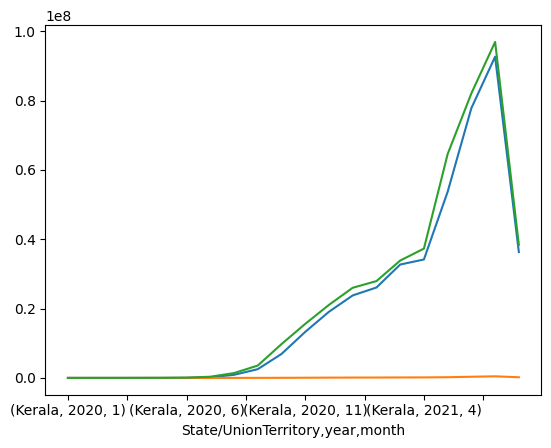

In [419]:
df_kerala_year_month_metrics.sum().Cured.plot();
df_kerala_year_month_metrics.sum().Deaths.plot();
df_kerala_year_month_metrics.sum().Confirmed.plot();

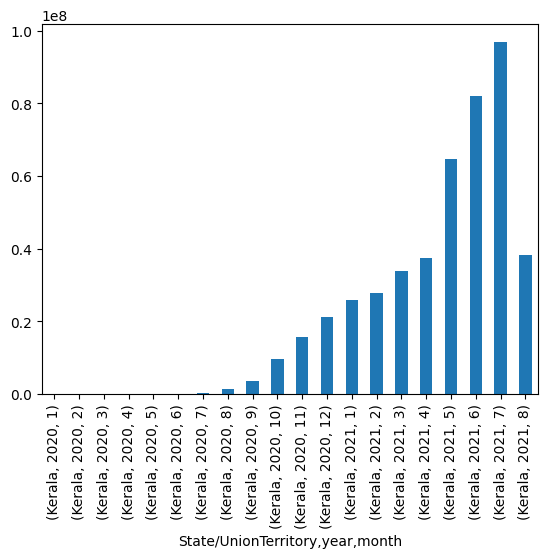

In [420]:
df_kerala_year_month_metrics.sum().Cured.plot(kind='bar');
df_kerala_year_month_metrics.sum().Deaths.plot(kind='bar');
df_kerala_year_month_metrics.sum().Confirmed.plot(kind='bar');

In [421]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,year,month,weekday,Total Cured,Total Deaths,Total Confirmed
Sno,,,,,,,,,,,
1,2020-01-30,Kerala,0,0,1,2020,1,3,0,0,1
2,2020-01-31,Kerala,0,0,1,2020,1,4,0,0,2
3,2020-02-01,Kerala,0,0,2,2020,2,5,0,0,4
4,2020-02-02,Kerala,0,0,3,2020,2,6,0,0,7
5,2020-02-03,Kerala,0,0,3,2020,2,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...
18106,2021-08-11,Telangana,638410,3831,650353,2021,8,2,5042520967,73339837,5448011754
18107,2021-08-11,Tripura,77811,773,80660,2021,8,2,5042598778,73340610,5448092414
18108,2021-08-11,Uttarakhand,334650,7368,342462,2021,8,2,5042933428,73347978,5448434876


#### Pivot & Pivot Table

In [436]:
df.pivot(columns='State/UnionTerritory', index='Date', values='Deaths')

State/UnionTerritory,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Cases being reassigned to states,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,129.0,13490.0,237.0,5357.0,9646.0,NaN,811.0,13536.0,NaN,4.0,...,8954.0,352.0,34260.0,3819.0,NaN,766.0,NaN,22771.0,7367.0,18202.0
2021-08-08,129.0,13513.0,240.0,5372.0,9646.0,NaN,811.0,13539.0,NaN,4.0,...,8954.0,355.0,34289.0,3823.0,NaN,767.0,NaN,22773.0,7367.0,18217.0
2021-08-09,129.0,13531.0,242.0,5387.0,9646.0,NaN,811.0,13540.0,NaN,4.0,...,8954.0,355.0,34317.0,3825.0,NaN,770.0,NaN,22773.0,7367.0,18229.0


In [444]:
df.pivot_table(index='State/UnionTerritory', columns=['year'], values=['Confirmed', 'Cured', 'Deaths'], aggfunc='sum')

Confirmed               \
year                                             2020         2021   
State/UnionTerritory                                                 
Andaman and Nicobar Islands                  590838.0    1347660.0   
Andhra Pradesh                            104134066.0  288298687.0   
Arunachal Pradesh                           1679508.0    5497399.0   
Assam                                      26440101.0   73396910.0   
Bihar                                      29298924.0  104363151.0   
Cases being reassigned to states             345565.0          NaN   
Chandigarh                                  1822281.0    9036346.0   
Chhattisgarh                               21901975.0  141874287.0   
Dadra and Nagar Haveli                            NaN      20722.0   
Dadra and Nagar Haveli and Daman and Diu     458804.0    1479828.0   
Daman & Diu                                       2.0          NaN   
Delhi                                      59971050.0  227256715.0   
Goa                                         5348774.0   22891385.0   
Gujarat                                    25944296.0  117475786.0   
Haryana                                    23704412.0  110642873.0   
Himachal Pradesh                            3493678.0   26539611.0   
Himanchal Pradesh                                 NaN     204516.0   
Jammu and Kashmir                          12464503.0   45653223.0   
Jharkhand                                  12394876.0   49717118.0   
Karanataka                                        NaN    2885238.0   
Karnataka                                  99337405.0  386633288.0   
Kerala                                     51854118.0  407051905.0   
Ladakh                                       884406.0    3169887.0   
Lakshadweep                                       0.0     915784.0   
Madhya Pradesh                             22613572.0  113803349.0   
Maharashtra                               222900632.0  904820431.0   
Manipur                                     2394294.0   10223649.0   
Meghalaya                                   1138564.0    6217405.0   
Mizoram                                      375091.0    2609641.0   
Nagaland                                    1178424.0    3863318.0   
Odisha                                     34566542.0  125563991.0   
Puducherry                                  4164401.0   15901490.0   
Punjab                                     17057020.0   82892682.0   
Rajasthan                                  27496951.0  134872705.0   
Sikkim                                       521693.0    2665106.0   
Tamil Nadu                                100522250.0  331406394.0   
Telangana                                         NaN   60571979.0   
Telengana                                  32264850.0   37725818.0   
Tripura                                     3814578.0   10235672.0   
Unassigned                                      161.0          NaN   
Uttar Pradesh                              62888710.0  249737133.0   
Uttarakhand                                 7960257.0   45180157.0   
West Bengal                                50095209.0  213012667.0   

                                                Cured                  Deaths  \
year                                             2020         2021       2020   
State/UnionTerritory                                                            
Andaman and Nicobar Islands                  534731.0    1313555.0     7772.0   
Andhra Pradesh                             95094768.0  275331762.0   871178.0   
Arunachal Pradesh                           1442769.0    5145380.0     4488.0   
Assam                                      23558817.0   69119863.0   108050.0   
Bihar                                      26953520.0   99571850.0   151678.0   
Cases being reassigned to states                  0.0          NaN        0.0   
Chandigarh                                  1596193.0    8520842.0    27470.0   
Chhattisgarh 

In [434]:
df.pivot_table(index='State/UnionTerritory', columns=['year', 'month'], values='Deaths', aggfunc='sum')

year                                     2020                              \
month                                      1    2     3       4        5    
State/UnionTerritory                                                        
Andaman and Nicobar Islands               NaN  NaN   0.0     0.0      0.0   
Andhra Pradesh                            NaN  NaN   0.0   427.0   1469.0   
Arunachal Pradesh                         NaN  NaN   NaN     0.0      0.0   
Assam                                     NaN  NaN   NaN    20.0     77.0   
Bihar                                     NaN  NaN  10.0    43.0    259.0   
Cases being reassigned to states          NaN  NaN   NaN     NaN      0.0   
Chandigarh                                NaN  NaN   0.0     0.0     73.0   
Chhattisgarh                              NaN  NaN   0.0     0.0      2.0   
Dadra and Nagar Haveli                    NaN  NaN   NaN     NaN      NaN   
Dadra and Nagar Haveli and Daman and Diu  NaN  NaN   NaN     NaN      0.0   
Daman & Diu                               NaN  NaN   NaN     NaN      NaN   
Delhi                                     NaN  NaN  21.0   900.0   4916.0   
Goa                                       NaN  NaN   0.0     0.0      0.0   
Gujarat                                   NaN  NaN  30.0  1821.0  19128.0   
Haryana                                   NaN  NaN   0.0    72.0    365.0   
Himachal Pradesh                          NaN  NaN   8.0    30.0     85.0   
Himanchal Pradesh                         NaN  NaN   NaN     NaN      NaN   
Jammu and Kashmir                         NaN  NaN   8.0   127.0    458.0   
Jharkhand                                 NaN  NaN   NaN    48.0    103.0   
Karanataka                                NaN  NaN   NaN     NaN      NaN   
Karnataka                                 NaN  NaN  28.0   332.0   1103.0   
Kerala                                    0.0  0.0   3.0    84.0    142.0   
Ladakh                                    NaN  NaN   0.0     0.0      0.0   
Lakshadweep                               NaN  NaN   NaN     NaN      NaN   
Madhya Pradesh                            NaN  NaN  12.0  1614.0   7414.0   
Maharashtra                               NaN  NaN  49.0  5354.0  35892.0   
Manipur                                   NaN  NaN   0.0     0.0      0.0   
Meghalaya                                 NaN  NaN   NaN    16.0     31.0   
Mizoram                                   NaN  NaN   0.0     0.0      0.0   
Nagaland                                  NaN  NaN   NaN     0.0      0.0   
Odisha                                    NaN  NaN   0.0    24.0    124.0   
Puducherry                                NaN  NaN   0.0     0.0      8.0   
Punjab                                    NaN  NaN  15.0   362.0   1015.0   
Rajasthan                                 NaN  NaN   0.0   430.0   3905.0   
Sikkim                                    NaN  NaN   NaN     NaN      0.0   
Tamil Nadu                                NaN  NaN   6.0   385.0   2343.0   
Telangana                                 NaN  NaN   NaN     NaN      NaN   
Telengana                                 NaN  NaN   3.0   476.0   1242.0   
Tripura                                   NaN  NaN   NaN     0.0      0.0   
Unassigned                                NaN  NaN   0.0     0.0      NaN   
Uttar Pradesh                             NaN  NaN   0.0   410.0   3339.0   
Uttarakhand                               NaN  NaN   0.0     0.0     50.0   
West Bengal                               NaN  NaN   9.0   295.0   6291.0   

year                                                                    \
month                                           6         7         8    
State/UnionTerritory                                                     
Andaman and Nicobar Islands                    0.0       8.0     794.0   
Andhra Pradesh                              2911.0   17526.0   79720.0   
Arunachal Pradesh                              5.0      73.0     130.0   
Assam        